In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import font_manager
from matplotlib.cm import viridis
from scipy.signal import savgol_filter
large=50
medium=30

# Radial Distribution Function 
We calculate the radial distribution function ($g(r)$) and use the defination of potential as,$u(r) = -log(g(r))$ for the arrested state configuration of the defects.

/tmp/ipykernel_123342/3367792658.py:35: RuntimeWarning: divide by zero encountered in log
  ax.plot(R[::20], -np.log(smoothed_avg_values[::20]), marker="s", label=r"$\zeta = %d$" % zeta, color=color)
/tmp/ipykernel_123342/3367792658.py:35: RuntimeWarning: invalid value encountered in log
  ax.plot(R[::20], -np.log(smoothed_avg_values[::20]), marker="s", label=r"$\zeta = %d$" % zeta, color=color)


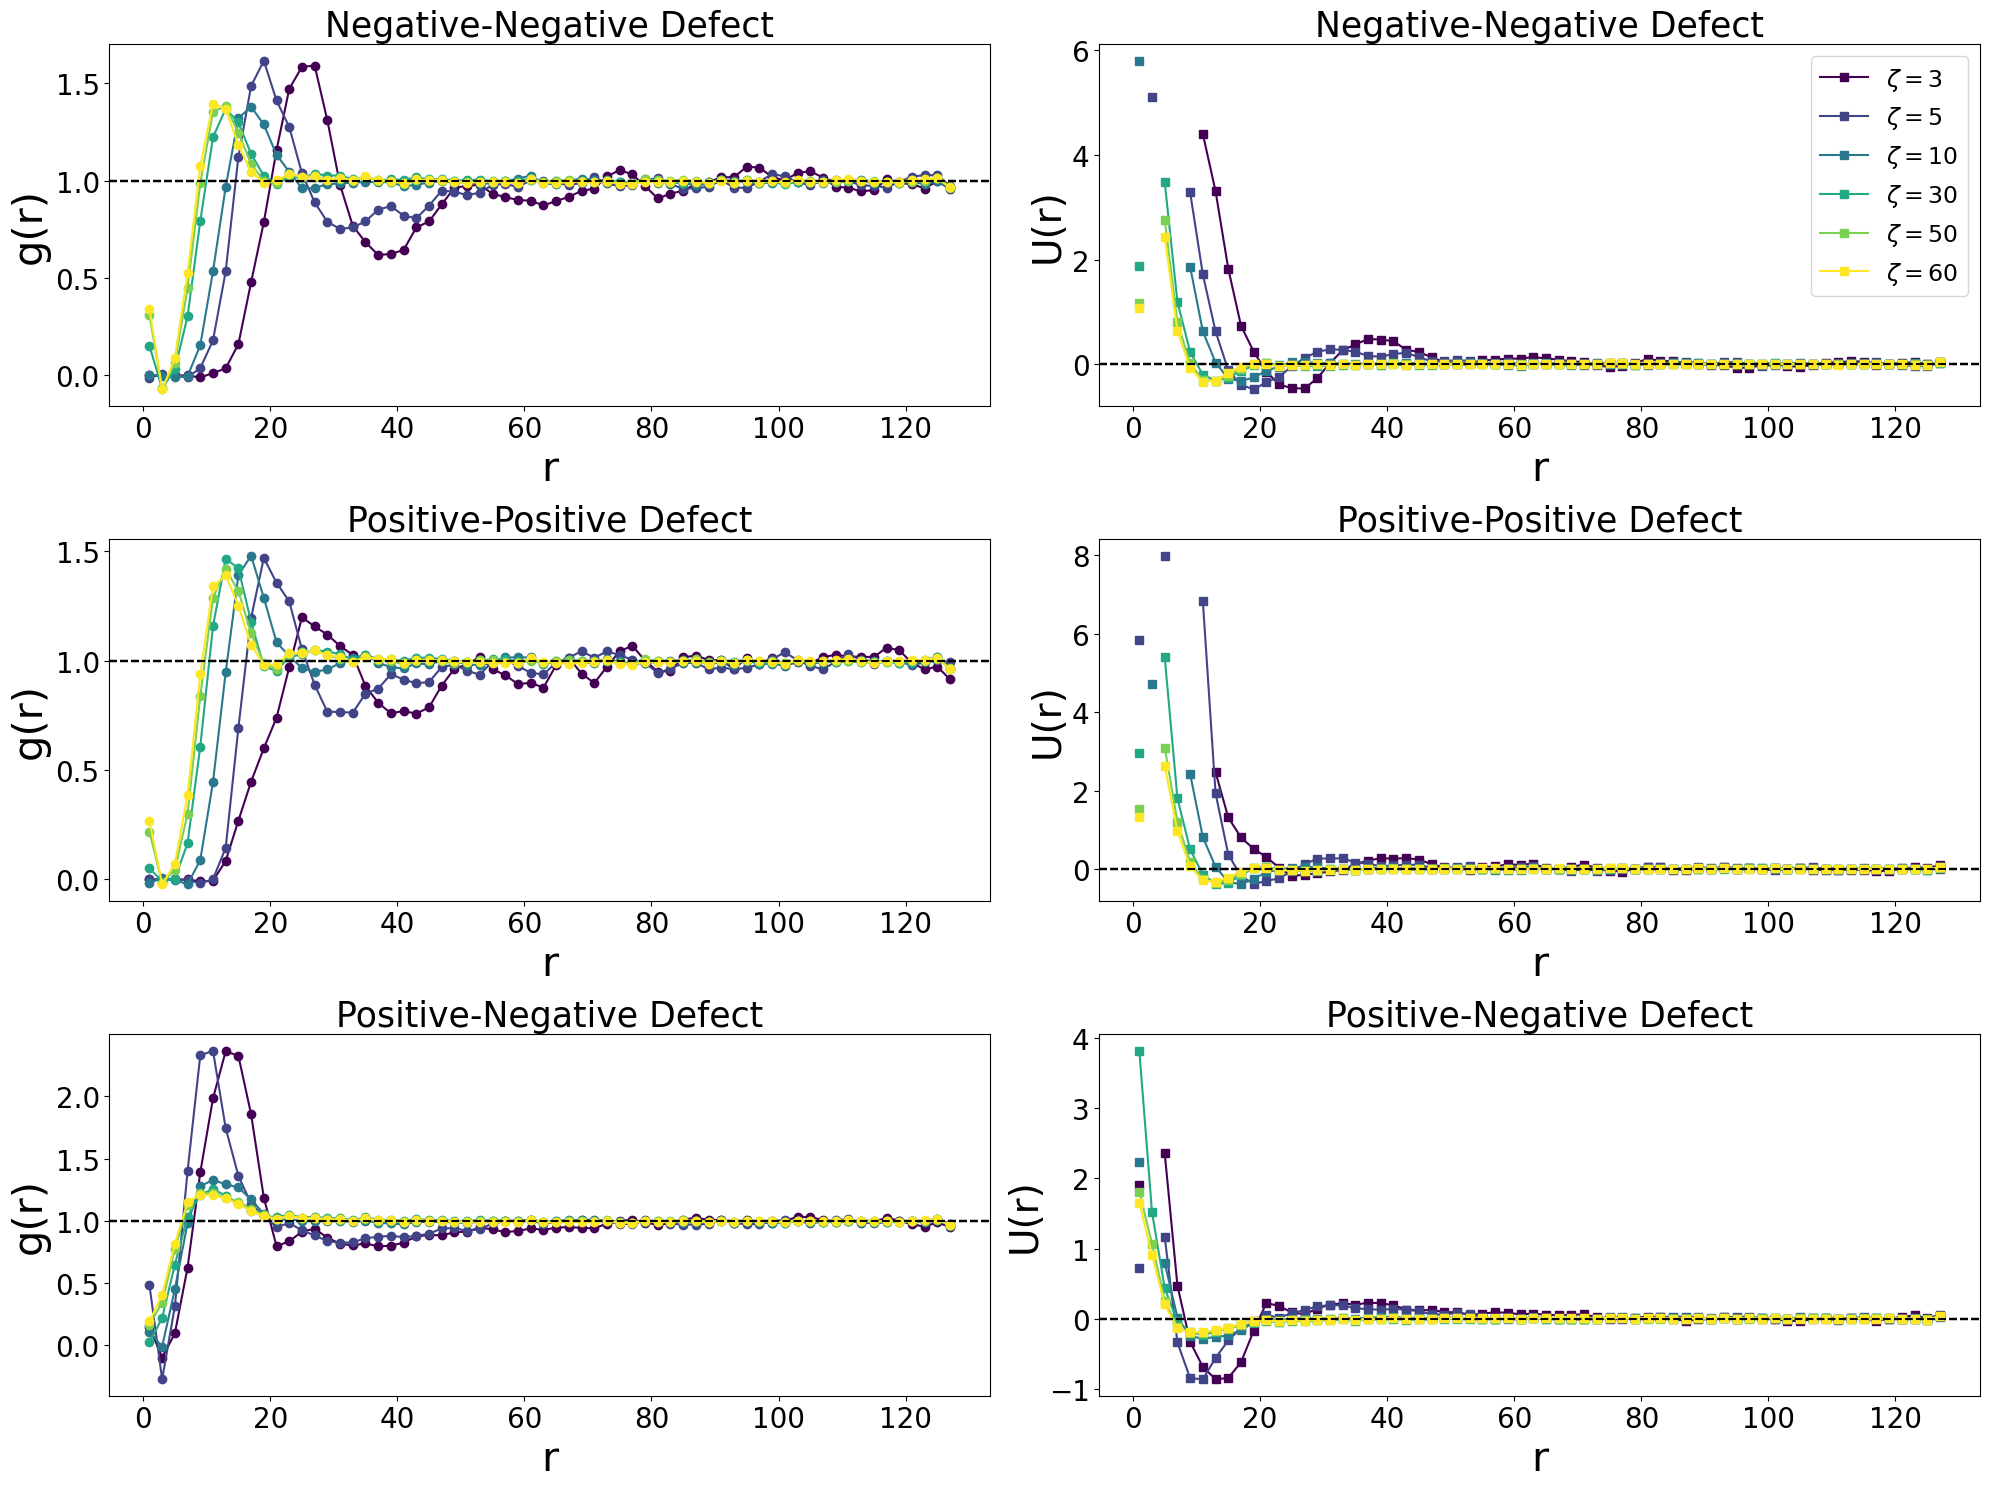

In [4]:
# Defect types and zeta values
defect_types = ['nn', 'pp', 'pn']
zeta_list = [3, 5, 10, 30, 50, 60]
R = np.arange(1, 128, 0.1)
defect_names = {
    'nn': 'Negative-Negative',
    'pp': 'Positive-Positive',
    'pn': 'Positive-Negative'
}
# Get a list of colors from the Viridis colormap
colors = viridis(np.linspace(0, 1, len(zeta_list)))

# Create a figure with 6 subplots (2 per row)
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

for row, defect in enumerate(defect_types):
    for col in range(2):
        ax = axes[row, col]
        
        for zeta, color in zip(zeta_list, colors):
            input_file = f"{defect}_average_file_{zeta}.txt"
            data = np.loadtxt(input_file)
            avg_values = np.nanmean(data, axis=1)

            # Apply Savgol filter to smooth the data
            smoothed_avg_values = savgol_filter(avg_values, window_length=100, polyorder=3)

            if col == 0:
                # Plot g(r)
                ax.plot(R[::20], smoothed_avg_values[::20], marker="o", label=r"$\zeta = %d$" % zeta, color=color)
                ax.set_ylabel("g(r)", fontsize=30)
                ax.axhline(y=1,color='k',linestyle='--')
            else:
                # Plot -log(g(r))
                ax.plot(R[::20], -np.log(smoothed_avg_values[::20]), marker="s", label=r"$\zeta = %d$" % zeta, color=color)
                ax.set_ylabel(r"U(r)", fontsize=28)
                ax.axhline(y=0,color='k',linestyle='--')
        
        # Set the common x-label for both types of plots
        ax.set_xlabel("r", fontsize=30)
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.tick_params(axis='both', which='minor', labelsize=15)

        # Add title to the first plot in each row
# Update the title section
        if col == 0:
            ax.set_title(f"{defect_names[defect]} Defect", fontsize=25)
        else:
            ax.set_title(f"{defect_names[defect]} Defect", fontsize=25)
        # Add legend only for the first plot
        if row == 0 and col == 1:
            ax.legend(loc="upper right", fontsize=17)

# Adjust the layout and save the figure
plt.tight_layout()
plt.savefig("defects_g_r_log.png",dpi=600)
plt.show()
plt.close()
